In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis

In [ ]:
from TemporalAbstraction import NumericalAbstraction

In [ ]:
df = pd.read_pickle("../../data/interim/02_outliers_removed_chauvenets.pkl")

In [ ]:
predictor_columns = list(df.columns[:6])

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [ ]:
for col in predictor_columns:
    df[col] = df[col].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [ ]:
df[df["set"]== 25]

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-15 19:09:07.200,0.169000,0.645000,0.662000,5.9390,-4.6950,0.5610,A,squat,heavy,25
2019-01-15 19:09:07.400,0.163000,0.631000,0.658000,-1.5976,-2.9636,1.0732,A,squat,heavy,25
2019-01-15 19:09:07.600,0.153667,0.571333,0.607000,-6.1706,-3.9636,1.4998,A,squat,heavy,25
2019-01-15 19:09:07.800,0.180500,0.620500,0.675500,-3.8414,-3.1586,0.2440,A,squat,heavy,25
2019-01-15 19:09:08.000,0.185667,0.644667,0.727333,-10.3538,-3.2560,-4.0854,A,squat,heavy,25
...,...,...,...,...,...,...,...,...,...,...
2019-01-15 19:09:26.800,0.186667,0.505667,0.433667,-7.5610,7.1220,4.8780,A,squat,heavy,25
2019-01-15 19:09:27.000,0.234500,0.682000,0.572500,-15.5608,-2.8780,7.2562,A,squat,heavy,25
2019-01-15 19:09:27.200,0.265000,0.655667,0.700333,-2.3658,-2.8658,2.1222,A,squat,heavy,25


<Axes: xlabel='epoch (ms)'>

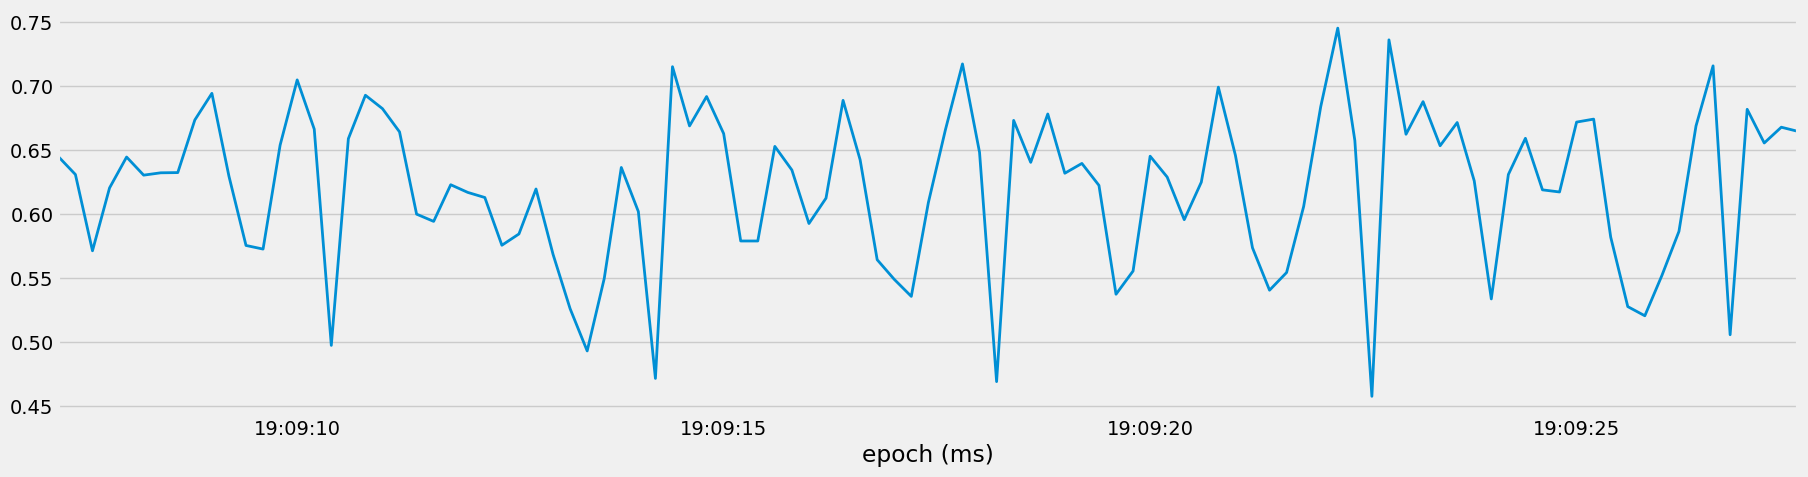

In [ ]:
df[df["set"]== 25]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

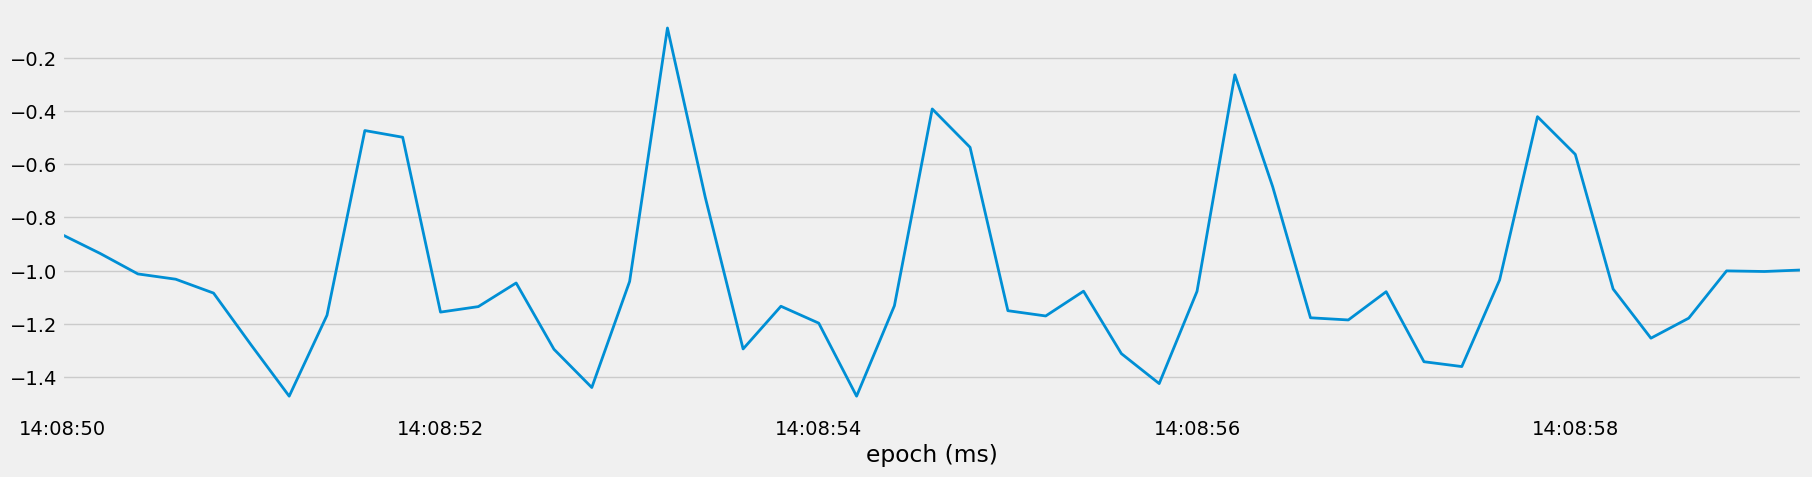

In [ ]:
df[df["set"]== 50]["acc_y"].plot()

In [ ]:
df[df["set"]== 50]

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-15 14:08:50.000,-0.012000,-0.865000,0.187000,-46.5245,-3.018000,-11.9510,C,row,heavy,50
2019-01-15 14:08:50.200,0.011000,-0.935333,0.077000,-45.2926,-4.475800,-9.7316,C,row,heavy,50
2019-01-15 14:08:50.400,0.021000,-1.012500,-0.013000,-22.6832,-10.183000,-6.5486,C,row,heavy,50
2019-01-15 14:08:50.600,0.032000,-1.032333,-0.072667,-1.5732,-6.292800,0.2804,C,row,heavy,50
2019-01-15 14:08:50.800,0.022500,-1.084500,-0.116000,5.0608,-0.500200,4.2804,C,row,heavy,50
2019-01-15 14:08:51.000,0.030000,-1.280667,-0.148000,6.5490,-4.317200,1.1342,C,row,heavy,50
2019-01-15 14:08:51.200,0.053000,-1.472000,-0.178000,32.4148,-29.878000,-23.4634,C,row,heavy,50
2019-01-15 14:08:51.400,0.176667,-1.167667,0.076667,37.6342,-29.878200,-30.9636,C,row,heavy,50
2019-01-15 14:08:51.600,0.117500,-0.473500,0.105000,33.6828,-11.439000,6.9024,C,row,heavy,50


In [ ]:
df[df["set"] == 1]

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:10:08.400,0.003667,0.966333,-0.081000,1.8412,-4.7806,-2.5608,A,bench,heavy,1
2019-01-11 15:10:08.600,-0.012500,0.962500,-0.089000,2.1950,-2.1096,-2.8538,A,bench,heavy,1
2019-01-11 15:10:08.800,-0.028000,0.867000,-0.125000,9.5246,-2.8290,-11.1828,A,bench,heavy,1
2019-01-11 15:10:09.000,-0.062000,0.873000,-0.155000,16.5608,-4.4268,-13.0368,A,bench,heavy,1
2019-01-11 15:10:09.200,-0.096667,0.904333,-0.169000,7.6952,-11.8538,-3.0364,A,bench,heavy,1
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:10:24.000,0.038667,0.967667,-0.100000,-0.2194,-4.9756,-3.8658,A,bench,heavy,1
2019-01-11 15:10:24.200,0.018500,0.972500,-0.083000,0.7924,-1.8536,0.6220,A,bench,heavy,1
2019-01-11 15:10:24.400,0.019667,0.970333,-0.079667,-1.9270,0.5852,-2.0246,A,bench,heavy,1


In [ ]:
df[df["set"] == 1].index[0]

Timestamp('2019-01-11 15:10:08.400000')

In [ ]:
df[df["set"] == 1].index[-1]

Timestamp('2019-01-11 15:10:24.800000')

In [ ]:
duration = df[df["set"] == 1].index[-1] - df[df["set"] ==1].index[0]

In [ ]:
duration

Timedelta('0 days 00:00:16.400000')

In [ ]:
duration.seconds

16

In [ ]:
df["set"].unique()

array([30,  1, 31,  3,  9, 32, 10, 33, 11, 34, 35, 15, 36, 16, 37, 17, 27,
       38, 28, 29,  6, 65, 67, 73,  4,  2, 39, 40, 12, 41, 13, 45, 14, 46,
       51, 22, 47, 23, 49, 68, 66, 76, 77, 78, 52, 83, 48, 85, 50, 24, 53,
       25, 54, 26, 55,  7, 42,  8, 43,  5, 44, 84, 86, 92, 93, 74, 75, 72,
       63, 64, 62, 56, 57, 18, 58, 20, 59, 60, 61, 69, 70, 19, 71, 21, 87,
       89, 91, 80, 82, 88, 90])

In [ ]:
for s in df["set"].unique():
    
    start = df[df["set"] == s].index[0]
    stop = df[df["set"] == s].index[-1]
      
    duration = stop - start
    df.loc[(df["set"]== s),"duration"] = duration.seconds

In [ ]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [ ]:
df.groupby(["category"])["duration"].mean()

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [ ]:
duration_df = df.groupby(["category"])["duration"].mean()

In [ ]:
duration_df.iloc[0]

np.float64(14.743500866551127)

In [ ]:
duration_df.iloc[1]

np.float64(24.942528735632184)

In [ ]:
duration_df.iloc[0] /5

np.float64(2.9487001733102254)

In [ ]:
duration_df.iloc[1] /10

np.float64(2.4942528735632186)

<Axes: xlabel='epoch (ms)'>

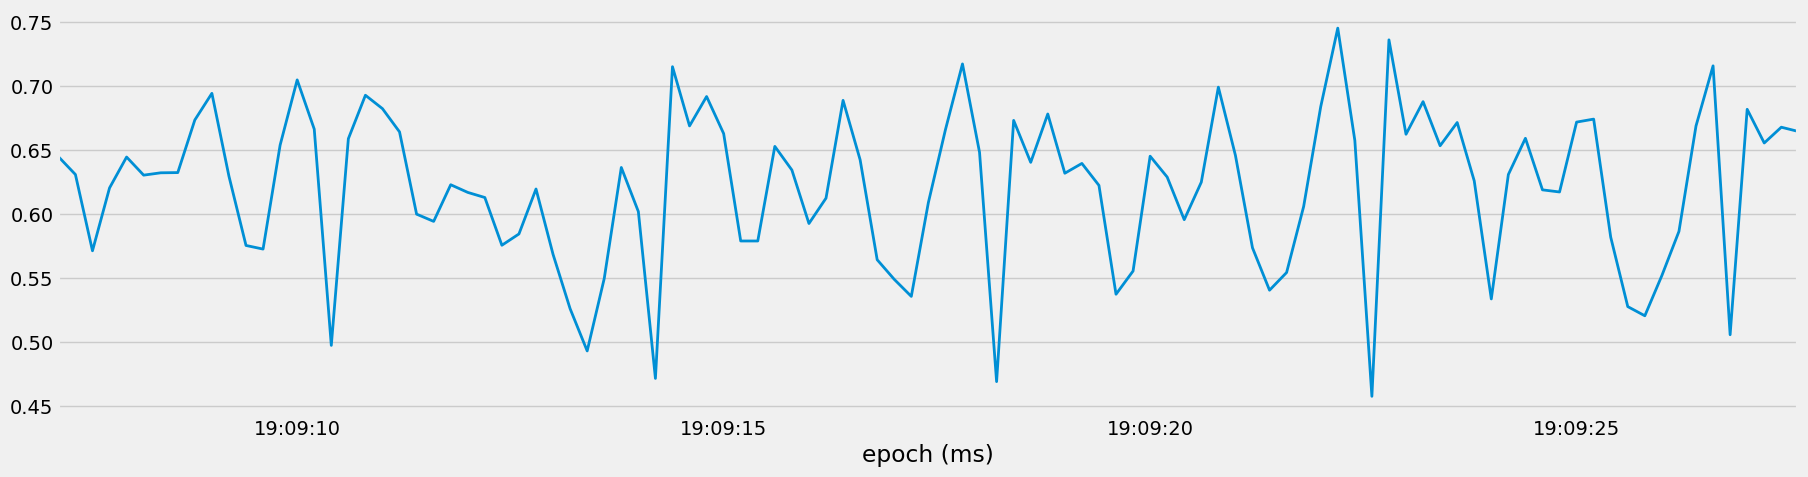

In [ ]:
df[df["set"]== 25]["acc_y"].plot()

In [ ]:
df_lowpass = df.copy()

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [ ]:
LowPass = LowPassFilter()

In [ ]:
fs  = 1000/200

In [ ]:
fs

5.0

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [ ]:
cutoff = 1

In [ ]:
df_lowpass = LowPass.low_pass_filter(df_lowpass,"acc_y",fs, cutoff, order=5)

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0,0.977022
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0,0.962269
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0,0.966368
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0,0.979343
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0,0.966609
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0,-1.010877
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0,-0.986139
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0,-1.026145


In [ ]:
subset = df_lowpass[df_lowpass["set"] == 45]

In [ ]:
subset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-14 13:54:34.800,-0.058500,1.412000,0.003167,-0.24400,10.3902,-22.8172,C,ohp,heavy,45,15.0,1.211633
2019-01-14 13:54:35.000,-0.202000,1.180333,0.101333,39.34160,24.2865,-85.0976,C,ohp,heavy,45,15.0,1.097067
2019-01-14 13:54:35.200,-0.297500,0.640500,0.199500,-16.15860,38.1828,22.1830,C,ohp,heavy,45,15.0,0.841495
2019-01-14 13:54:35.400,-0.232333,0.759667,0.157667,-1.68300,5.7682,75.4634,C,ohp,heavy,45,15.0,0.652357
2019-01-14 13:54:35.600,-0.081500,0.513500,0.028500,16.40240,-5.8048,27.0122,C,ohp,heavy,45,15.0,0.670551
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:54:49.600,-0.322000,0.800500,0.046500,11.04900,-19.2316,-33.7560,C,ohp,heavy,45,15.0,0.772735
2019-01-14 13:54:49.800,-0.394667,0.811333,0.061667,12.65860,-23.6706,-12.1338,C,ohp,heavy,45,15.0,0.777915
2019-01-14 13:54:50.000,-0.400000,0.920500,0.117000,27.34140,-40.7318,53.9024,C,ohp,heavy,45,15.0,0.920860


In [ ]:
print(subset["label"][0])

ohp


<ipython-input-48-823db250493d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset["label"][0])


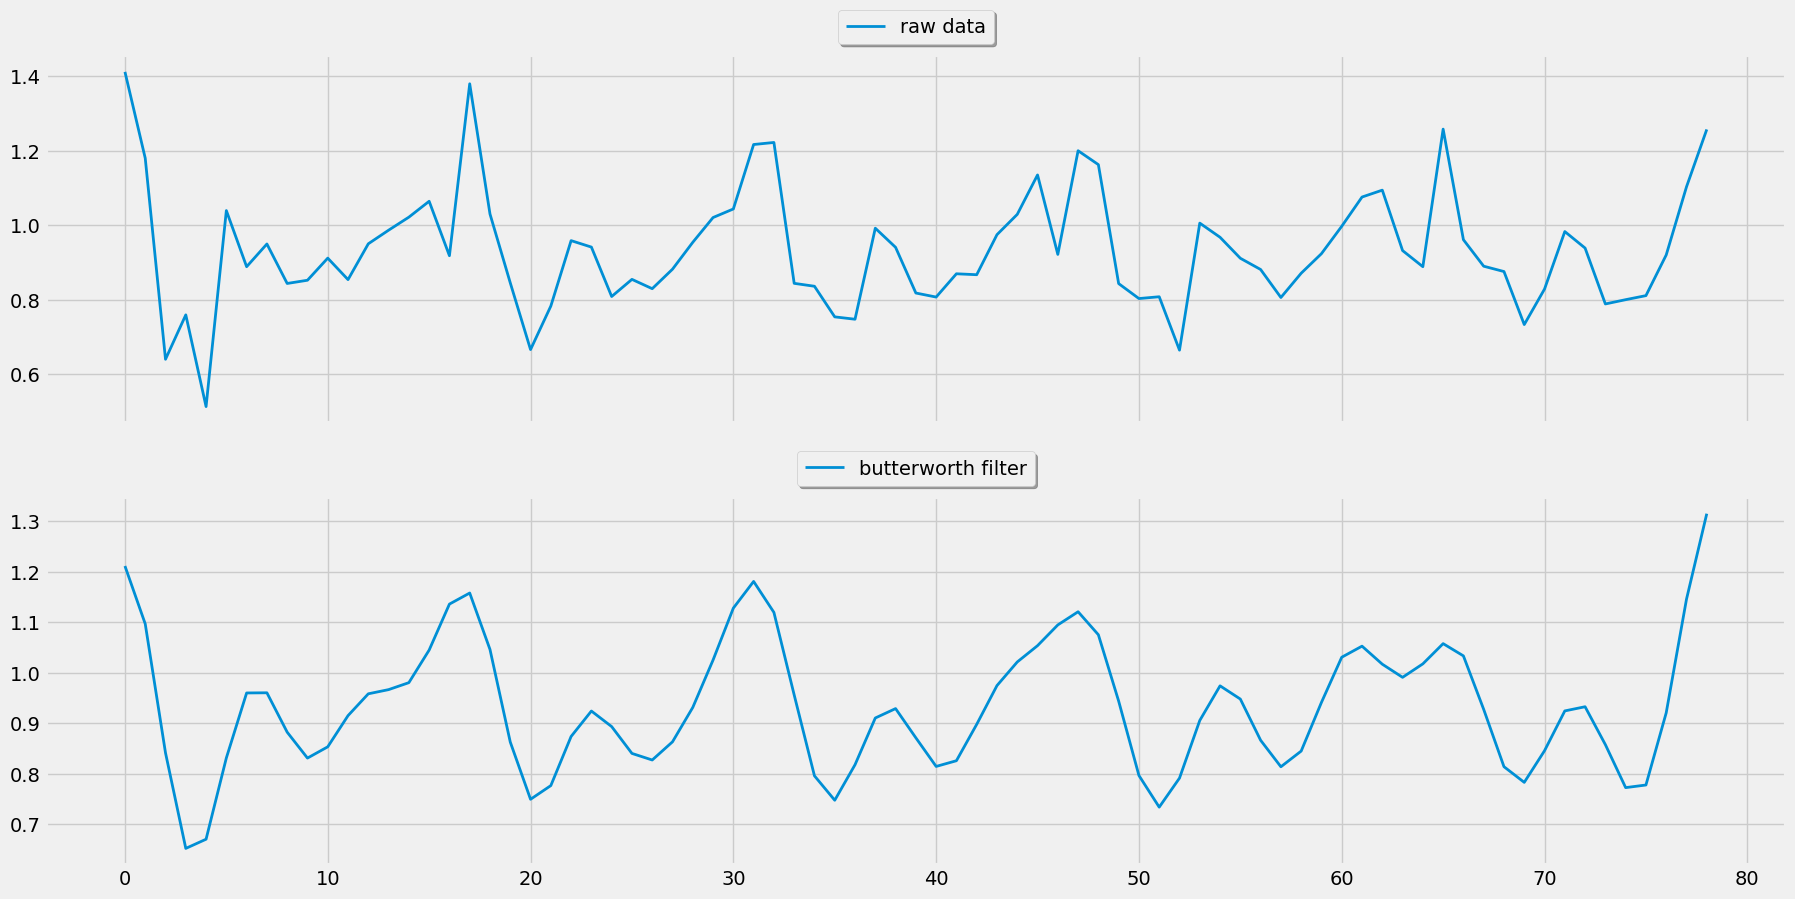

In [ ]:
fig,ax = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

ohp


<ipython-input-51-d124ef15f7c7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset["label"][0])


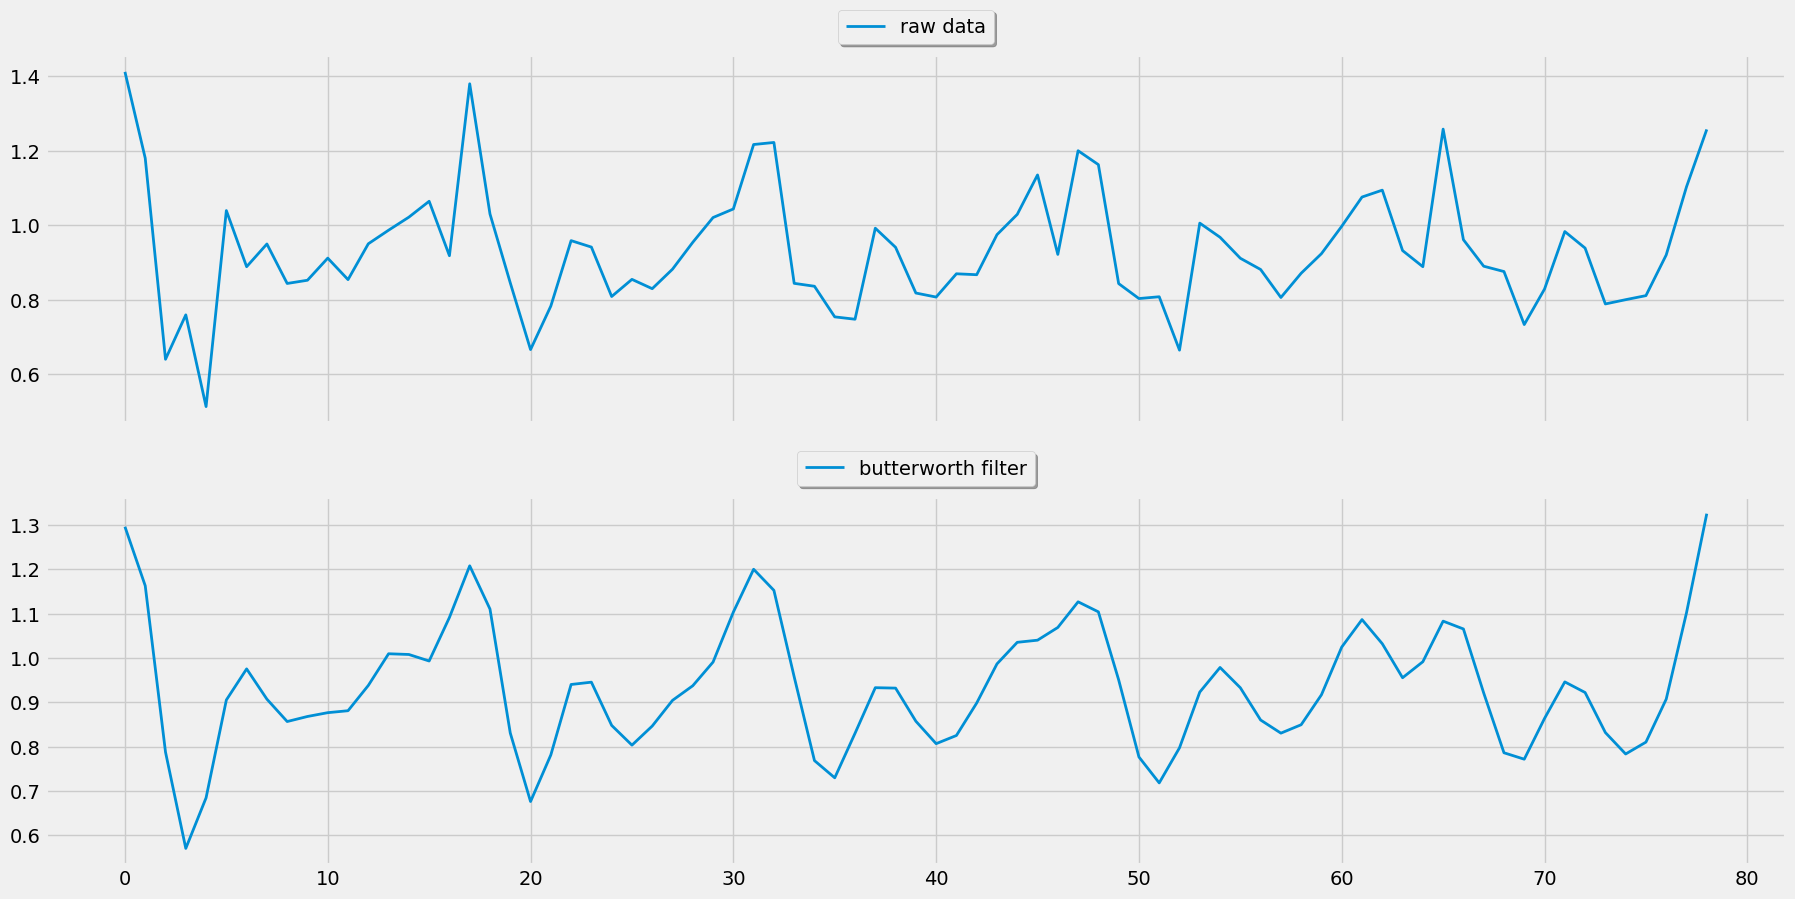

In [ ]:
cutoff = 1.3

df_lowpass = LowPass.low_pass_filter(df_lowpass,"acc_y",fs, cutoff, order=5)

subset = df_lowpass[df_lowpass["set"] == 45]
print(subset["label"][0])

fig,ax = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5,1.15), fancybox=True, shadow=True)

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0,0.977003
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0,0.973169
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0,0.966879
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0,0.962244
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0,0.959572
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0,-0.988153
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0,-1.053448
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0,-1.044737


In [ ]:
df_lowpass = df.copy()

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [ ]:
for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass,col,fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

In [ ]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013507,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.008033,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.009115,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.023861,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.020992,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045042,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.041659,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.047054,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0


In [ ]:
df_pca = df_lowpass.copy()

In [ ]:
PCA = PrincipalComponentAnalysis()

In [ ]:
pc_values = PCA.determine_pc_explained_variance(df_pca,predictor_columns)

In [ ]:
pc_values

array([0.58042786, 0.27305128, 0.06455521, 0.05311801, 0.01868648,
       0.01016116])

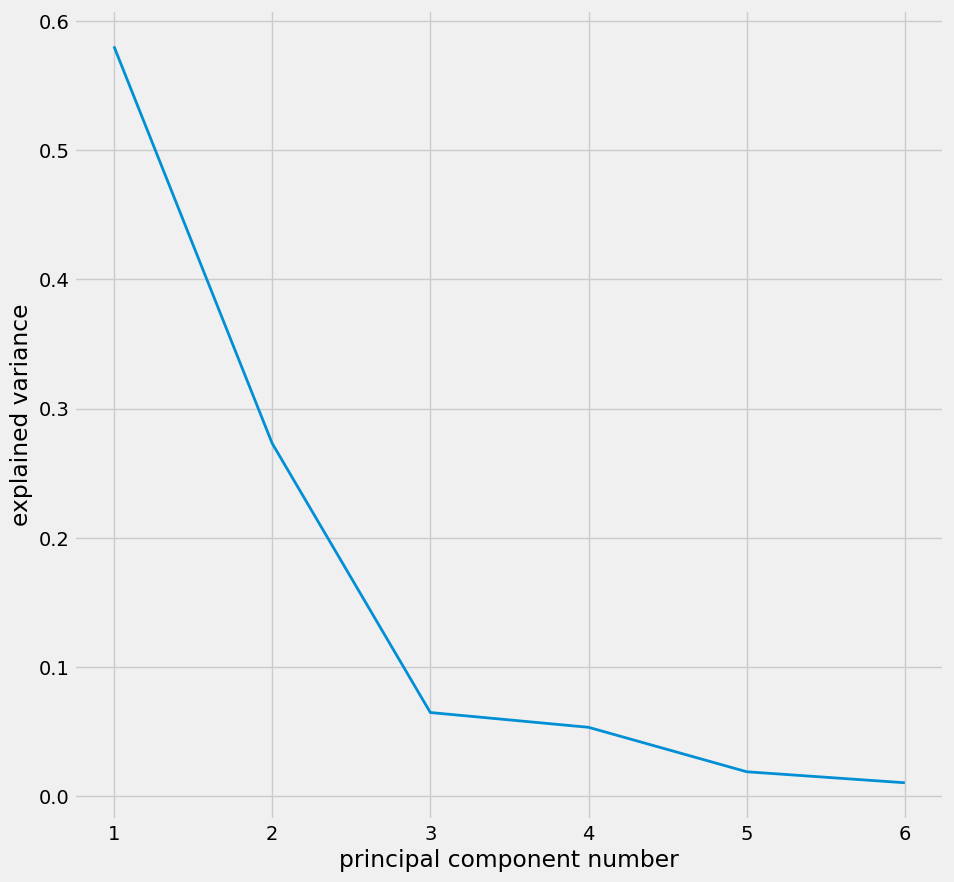

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,len(predictor_columns) + 1),pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()

In [ ]:
df_pca = PCA.apply_pca(df_pca,predictor_columns,3)

In [ ]:
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013507,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,30,16.0,0.315890,-0.075945,0.071591
2019-01-11 15:08:05.400,0.008033,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,30,16.0,0.314910,-0.074441,0.069024
2019-01-11 15:08:05.600,-0.009115,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,30,16.0,0.314269,-0.080894,0.065519
2019-01-11 15:08:05.800,-0.023861,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,30,16.0,0.314267,-0.091175,0.061686
2019-01-11 15:08:06.000,-0.020992,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,30,16.0,0.313488,-0.097709,0.062945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045042,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,19.0,-0.349431,-0.148203,-0.053608
2019-01-20 17:33:27.200,-0.041659,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,90,19.0,-0.371825,-0.150922,-0.058547
2019-01-20 17:33:27.400,-0.047054,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,90,19.0,-0.368426,-0.152396,-0.058147


In [ ]:
df_pca = PCA.apply_pca(df_pca,predictor_columns,3)

In [ ]:
subset = df_pca[df_pca["set"] == 35]

In [ ]:
subset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:48:54.800,-0.094123,0.891041,-0.005994,-2.338054,-3.884629,1.745296,B,ohp,medium,35,21.0,0.294214,-0.059511,0.003555
2019-01-11 15:48:55.000,-0.096238,0.953323,0.080001,-3.814675,-2.375120,4.447539,B,ohp,medium,35,21.0,0.313528,-0.007328,-0.014685
2019-01-11 15:48:55.200,-0.134537,1.182284,0.049543,0.341722,-5.827977,-14.474650,B,ohp,medium,35,21.0,0.395519,-0.024155,-0.008736
2019-01-11 15:48:55.400,-0.211281,1.266713,-0.097444,1.836545,-15.200894,-38.378502,B,ohp,medium,35,21.0,0.434487,-0.120929,-0.002960
2019-01-11 15:48:55.600,-0.295867,1.034657,-0.229331,-8.084908,-15.295883,-34.485185,B,ohp,medium,35,21.0,0.366113,-0.220556,-0.030979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 15:49:15.600,-0.345329,0.948756,-0.227174,-20.037197,-17.034945,1.458312,B,ohp,medium,35,21.0,0.341341,-0.230581,-0.070470
2019-01-11 15:49:15.800,-0.419787,1.266271,-0.151429,-47.826553,-23.376297,24.493841,B,ohp,medium,35,21.0,0.454782,-0.188105,-0.126855
2019-01-11 15:49:16.000,-0.341241,1.171543,-0.035990,-28.663875,-19.242887,14.107873,B,ohp,medium,35,21.0,0.412427,-0.110266,-0.107282


In [ ]:
subset[["pca_1","pca_2","pca_3"]]

,pca_1,pca_2,pca_3
epoch (ms),,,
2019-01-11 15:48:54.800,0.294214,-0.059511,0.003555
2019-01-11 15:48:55.000,0.313528,-0.007328,-0.014685
2019-01-11 15:48:55.200,0.395519,-0.024155,-0.008736
2019-01-11 15:48:55.400,0.434487,-0.120929,-0.002960
2019-01-11 15:48:55.600,0.366113,-0.220556,-0.030979
...,...,...,...
2019-01-11 15:49:15.600,0.341341,-0.230581,-0.070470
2019-01-11 15:49:15.800,0.454782,-0.188105,-0.126855
2019-01-11 15:49:16.000,0.412427,-0.110266,-0.107282


<Axes: xlabel='epoch (ms)'>

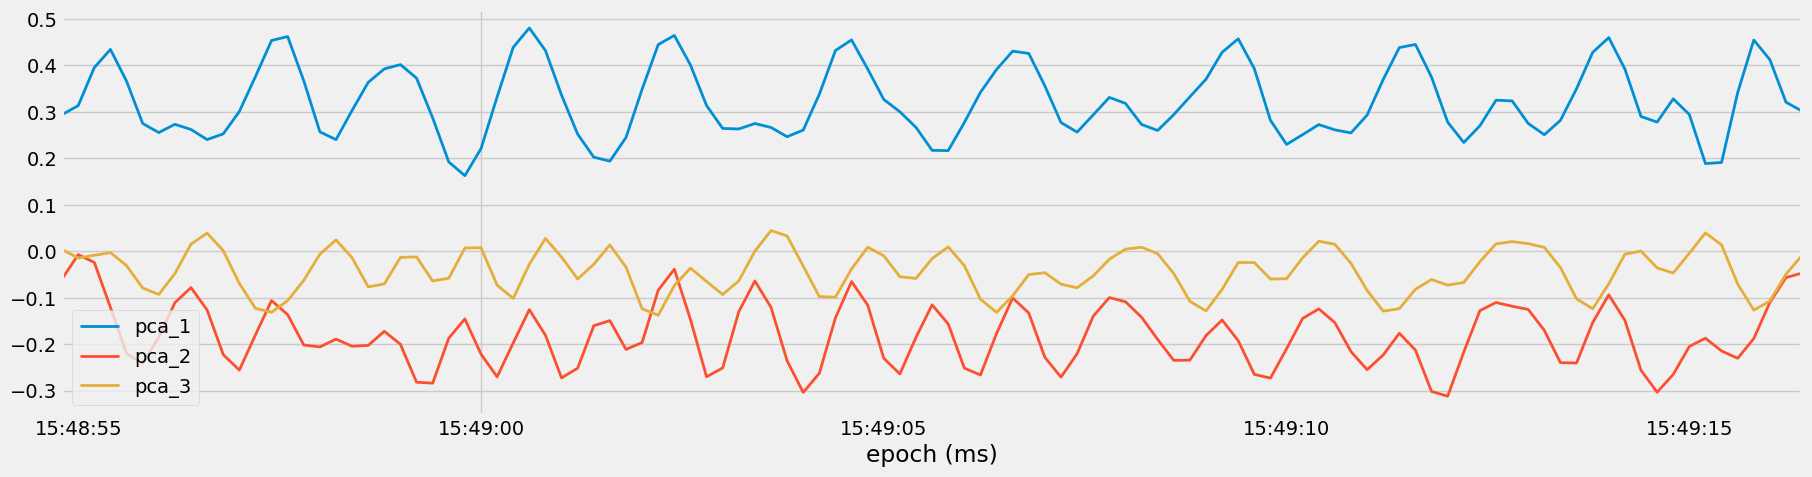

In [ ]:
subset[["pca_1","pca_2","pca_3"]].plot()

In [ ]:
df_squared = df_pca.copy()

In [ ]:
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2

In [ ]:
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

In [ ]:
df_squared["acc_r"] = np.sqrt(acc_r)

In [ ]:
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [ ]:
subset = df_squared[df_squared["set"] == 18]

In [ ]:
subset

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-18 17:22:26.000,0.739424,0.178588,-0.158717,1.542044,-1.598563,0.872745,A,rest,sitting,18,33.0,-0.016390,-0.029551,0.381691,0.777067,2.386417
2019-01-18 17:22:26.200,1.040247,-0.144903,-0.193405,3.306557,3.319560,0.493782,A,rest,sitting,18,33.0,-0.151646,-0.008926,0.510564,1.067950,4.711328
2019-01-18 17:22:26.400,1.047995,-0.122968,-0.178639,1.108897,2.959040,1.350801,A,rest,sitting,18,33.0,-0.145145,0.001816,0.510274,1.070200,3.436602
2019-01-18 17:22:26.600,0.960622,-0.029613,-0.151857,-1.500770,-4.028636,0.486921,A,rest,sitting,18,33.0,-0.106416,0.005454,0.467674,0.973002,4.326582
2019-01-18 17:22:26.800,0.966071,-0.054056,-0.142872,4.253977,-0.901537,-1.735733,A,rest,sitting,18,33.0,-0.115584,0.010852,0.471182,0.978073,4.682078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-18 17:22:59.000,0.982361,-0.196928,0.116640,41.727877,-7.841397,-20.131505,A,rest,sitting,18,33.0,-0.172992,0.160224,0.441513,1.008671,46.989155
2019-01-18 17:22:59.200,0.923813,-0.137298,0.121193,61.765530,21.902857,-2.517205,A,rest,sitting,18,33.0,-0.148281,0.155517,0.429367,0.941790,65.582408
2019-01-18 17:22:59.400,0.898521,-0.337650,0.162960,35.967573,48.404560,63.848442,A,rest,sitting,18,33.0,-0.214864,0.169931,0.373627,0.973603,87.825346


In [ ]:
subset = df_squared[df_squared["set"] == 14]

In [ ]:
subset = df_squared[df_squared["set"] == 14]

In [ ]:
subset[["acc_r","gyr_r"]]

,acc_r,gyr_r
epoch (ms),,
2019-01-14 13:55:42.600,1.387356,27.175490
2019-01-14 13:55:42.800,1.194574,49.126452
2019-01-14 13:55:43.000,0.957859,26.596182
2019-01-14 13:55:43.200,0.877878,21.412984
2019-01-14 13:55:43.400,0.900913,37.411295
...,...,...
2019-01-14 13:55:56.600,1.155075,44.997239
2019-01-14 13:55:56.800,1.167564,9.335764
2019-01-14 13:55:57.000,1.022252,16.738685


array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

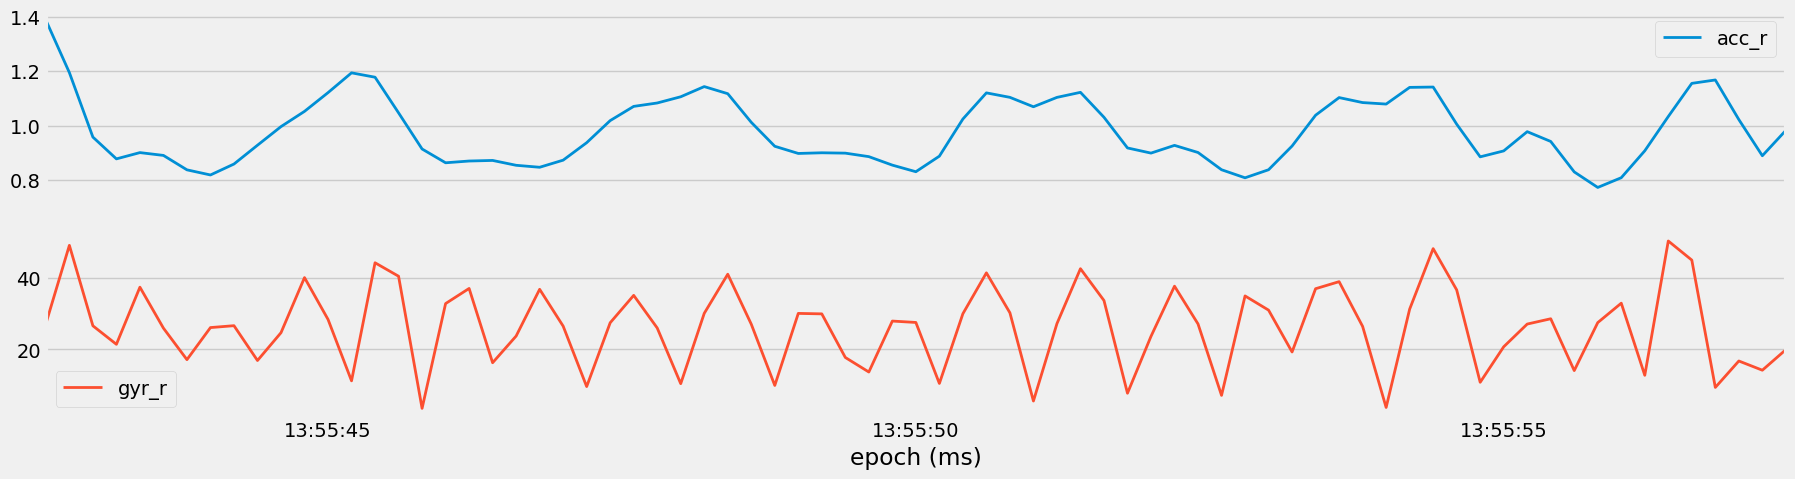

In [ ]:
subset[["acc_r","gyr_r"]].plot(subplots=True)